<a href="https://colab.research.google.com/github/LiFeLeSS5858/Hierarchy-Analysis-method/blob/main/TPR_4_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

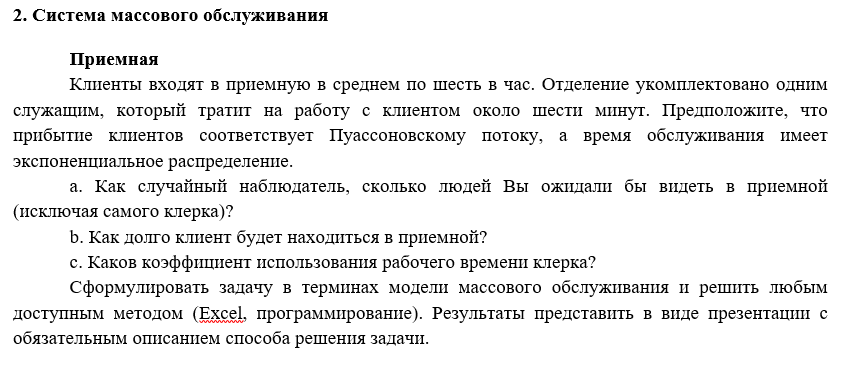

In [ ]:
#клиентов в час Пуассоновское распределение
from scipy. stats import poisson

client_stream = poisson.rvs(mu=6, size=1000)
client_stream

array([ 4,  8,  4,  9,  5,  4,  2,  9,  4,  3,  6,  2,  6,  7,  4,  7,  6,
        6,  7,  8, 10, 12,  6,  4,  7,  3,  6,  2,  4,  4,  6,  6,  8,  9,
        8,  6,  5,  6,  5, 11, 13,  7,  3,  5,  6,  3,  4,  5,  3,  9,  5,
        4,  8,  4,  7,  4,  4,  4, 10,  7,  1,  5,  6,  8,  8, 11,  8,  2,
        6,  5,  6,  5,  3,  2,  5,  5,  7,  4,  7,  6,  4,  5,  5, 12,  3,
        6,  9,  8,  5,  6,  7,  3,  9,  7, 12, 13,  7,  5,  4,  4,  9,  5,
        6,  5, 10,  5,  8,  7,  5,  5, 10,  4,  4,  4,  3,  5,  7,  6,  8,
        9,  4,  5,  8,  5,  6,  4,  7,  3,  7,  8, 11,  8,  2,  3,  5,  9,
       10,  3, 13,  9,  9,  3,  7,  2,  7,  9,  2, 11,  9,  3,  4,  9, 10,
        9, 10,  4,  8,  4,  4,  3,  7, 10,  3, 13,  3,  3,  4,  7,  6,  6,
       12, 10,  5, 10,  2,  7,  9,  8,  3,  6,  6,  7,  6,  6,  9,  8,  4,
        3,  6,  4,  4,  4,  6,  4,  6,  6,  8,  9,  5,  4,  7,  4,  7,  8,
        5,  7,  8,  8,  4,  3,  5,  7,  6,  7,  5,  5,  5,  7,  5,  8, 10,
        5,  8,  5,  8,  7

In [ ]:
# Время обслуживание по экспоненциальному распределению
from scipy. stats import expon

client_inspection = expon.rvs(scale = 20 , size= 1000) # 1 служащий обслуживает 10 клиентов в час
client_inspection

array([2.36716080e+01, 4.70329041e+01, 1.25819893e+01, 5.24408833e+00,
       6.72921105e+01, 3.00013592e+00, 1.07434123e+01, 9.61535981e+00,
       1.96410156e+01, 2.03200609e+01, 5.86228797e+00, 4.59976861e+00,
       4.07433977e+00, 2.86732926e+01, 4.46212380e+01, 3.98784835e+01,
       5.10829343e+00, 3.31184424e+01, 1.00993235e+01, 1.10547362e+01,
       1.14718238e+00, 1.07068082e+01, 1.31186459e+01, 4.94701294e+00,
       2.41014537e+01, 1.21916751e+01, 5.07543757e+00, 3.03906653e+01,
       4.35039080e+00, 2.03561119e+01, 3.59229302e+01, 7.23745427e+01,
       2.13050563e+01, 1.02504982e+01, 1.06005021e+01, 4.95821856e+00,
       6.88276784e+00, 1.46075953e+01, 7.98003214e+00, 2.54573169e+01,
       8.72493514e+00, 2.47809766e+01, 2.85668496e+01, 8.32708898e-01,
       1.64516578e+01, 1.34690935e+01, 9.78500132e+00, 1.65807247e+01,
       5.95973278e+01, 1.79577362e+01, 1.63331358e+01, 2.08452149e+01,
       1.17278315e+01, 9.10755581e+00, 1.29302332e+01, 5.94365822e+00,
      

In [ ]:
import statistics

queue = 0
queue_list = []
pass_counter = 0
inspected_clients = []
k=0

for i in range(len(client_inspection)):

    queue += client_stream[i]      # клиенты прибывшие в i час
    start_queue = queue

    queue -= client_inspection[i]  # вычитаем клиентов обслуженных в i час

    if (queue) < 0: # перехват отрицательной очереди
        pass_counter += (60/client_inspection[i]*(-queue))/60 # узнаем количество времени которую кларк потратил на "отрицательную" очередь
        queue = 0

    inspected_clients.append(start_queue - queue) # число обслужанных клиентов в i час

    queue_list.append(queue)

k=(1000-pass_counter)/1000

print(f'Средняя длина очереди: {statistics.mean(queue_list)}')
print(f'Среднее число клиентов обслуженных за час: {statistics.fmean(inspected_clients)}')
print(f'Время которое в среднем тратит каждый клиент на приёмную: {60/statistics.fmean(inspected_clients)}')
print(f'Коэффициент использования рабочего времени : {k}')
print(f'При 2 Кларках')

Средняя длина очереди: 1.234667940293181
Среднее число клиентов обслуженных за час: 5.844
Время которое в среднем тратит каждый клиент на приёмную: 10.266940451745379
Коэффициент использования рабочего времени : 0.5604465443590343
При 2 Кларках
